In [2]:
import numpy as np

In [4]:
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
x = np.random.randn(10, 2)
h = np.matmul(x, W1) + b1

In [8]:
# activation function 비선형효과 부여

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
a = sigmoid(h)

In [14]:
x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1 # 은닉층
a = sigmoid(a)
s = np.matmul(a, W2) + b2 # 출력층

In [16]:
s.shape

(10, 3)

## (10, 3) 
## = 3차원 데이터(벡터)!! -> 각 차원의 값을 이용하여 3 클래스 분류가 가능
## = 벡터의 각 차원은 각 클래스에 대응하는 score임
## = 첫 번째 뉴런이 첫 번째 클래스, 두 번째 뉴런이 두 번째 클래스 ...
## = 가장 큰 값을 내뱉는 뉴런에 해당하는 클래스가 예측 결과가 될 것

### 붓꽃 품종 맞추기
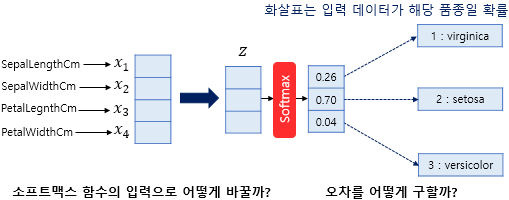


In [24]:
class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self, x):
        return 1 / (1 + np.exp(-x))

In [25]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]

    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

In [32]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 가중치와 편향 초기화
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        # 모든 가중치를 리스트에 모은다.
        self.params = []
        for layer in self.layers:
            self.params += layer.params # 리스트 결합

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [30]:
x = np.random.randn(10, 2) # inputsize=2, batchsize=10
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

In [31]:
s

array([[-3.28661628, -1.22765418, -1.08979583],
       [-1.85323764, -1.24374713, -1.62315044],
       [-2.82858738, -1.24826536, -1.3923242 ],
       [-2.79624053, -1.46811475, -1.62287565],
       [-2.47109932, -1.28343043, -1.61665677],
       [-2.26572148, -1.3342943 , -1.79630713],
       [-2.88874242, -1.54890245, -1.59739935],
       [-2.89958188, -0.99958813, -0.98373656],
       [-2.97685565, -1.4001447 , -1.43086628],
       [-2.83688876, -1.32111401, -1.46308228]])

In [3]:
# softmax with loss
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        # return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        # 출력 - (정답 레이블) = 오차
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        #데이터 1개당 오차를 전파
        dx = dx / batch_size

        return dx

In [19]:
import numpy as np
D, N = 8, 7
x = np.random.randn(1, D)               # 입력
y = np.repeat(x, N ,axis=0)             # 순전파 (col 방향 복제)
dy = np.random.randn(N, D)              # 무작위 기울기
dx = np.sum(dy, axis=0, keepdims=True)  # 역전파 (false면 (D), true면 2차원 유지 (1, D))

In [20]:
test = np.repeat(x, N ,axis=1) 
test.shape

(1, 56)

In [21]:
y.shape

(7, 8)

In [22]:
y

array([[-0.16381714,  0.71719857, -0.63125648,  0.28874617, -0.01783836,
        -0.19016685, -0.45107601, -1.81517715],
       [-0.16381714,  0.71719857, -0.63125648,  0.28874617, -0.01783836,
        -0.19016685, -0.45107601, -1.81517715],
       [-0.16381714,  0.71719857, -0.63125648,  0.28874617, -0.01783836,
        -0.19016685, -0.45107601, -1.81517715],
       [-0.16381714,  0.71719857, -0.63125648,  0.28874617, -0.01783836,
        -0.19016685, -0.45107601, -1.81517715],
       [-0.16381714,  0.71719857, -0.63125648,  0.28874617, -0.01783836,
        -0.19016685, -0.45107601, -1.81517715],
       [-0.16381714,  0.71719857, -0.63125648,  0.28874617, -0.01783836,
        -0.19016685, -0.45107601, -1.81517715],
       [-0.16381714,  0.71719857, -0.63125648,  0.28874617, -0.01783836,
        -0.19016685, -0.45107601, -1.81517715]])

In [23]:
D, N = 8, 7
x = np.random.randn(N, D)            # 입력
y = np.sum(x, axis=0, keepdims=True) # 순전파

In [24]:
dy = np.random.randn(1, D)           # 무작위 기울기
dx = np.repeat(dy, N, axis=0)        # 역전파

In [25]:
dy

array([[ 0.35219025, -0.45495367,  0.36368266, -0.74996849, -0.38662153,
         0.03725416, -0.82056994, -1.00337554]])

In [26]:
dx

array([[ 0.35219025, -0.45495367,  0.36368266, -0.74996849, -0.38662153,
         0.03725416, -0.82056994, -1.00337554],
       [ 0.35219025, -0.45495367,  0.36368266, -0.74996849, -0.38662153,
         0.03725416, -0.82056994, -1.00337554],
       [ 0.35219025, -0.45495367,  0.36368266, -0.74996849, -0.38662153,
         0.03725416, -0.82056994, -1.00337554],
       [ 0.35219025, -0.45495367,  0.36368266, -0.74996849, -0.38662153,
         0.03725416, -0.82056994, -1.00337554],
       [ 0.35219025, -0.45495367,  0.36368266, -0.74996849, -0.38662153,
         0.03725416, -0.82056994, -1.00337554],
       [ 0.35219025, -0.45495367,  0.36368266, -0.74996849, -0.38662153,
         0.03725416, -0.82056994, -1.00337554],
       [ 0.35219025, -0.45495367,  0.36368266, -0.74996849, -0.38662153,
         0.03725416, -0.82056994, -1.00337554]])

https://velog.io/@sue1199842/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%96%95%EC%9D%80-%EB%B3%B5%EC%82%AC%EC%99%80-%EA%B9%8A%EC%9D%80-%EB%B3%B5%EC%82%AC

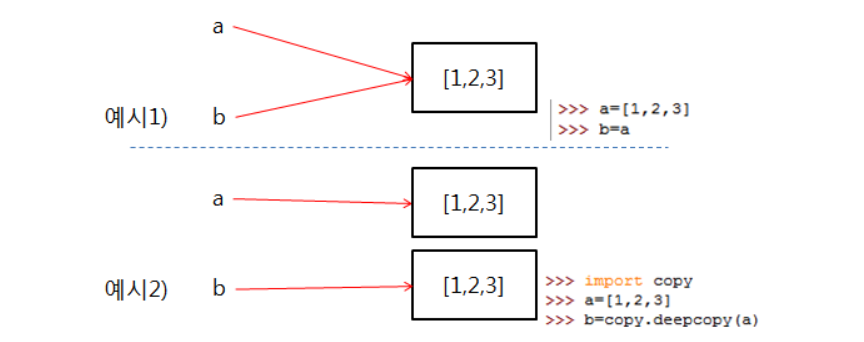

- a = b : 메모리 위치가 같아짐
- a[...] = b : 메모리 위치는 변하지 않고, 실제 데이터(원소) 복사

In [21]:
class MatMul:
    def __init__(self, W):
        self.params = [W] # list
        self.grads = [np.zeros_like(W)] # list '안'에 넘파이 어레이 1개
                                        # (input, output)
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW       # deep copy -> (...) 생략 ellipsis 기호, 메모리 위치 고정 
                                      # shallow copy -> grads[0] = dW, 할당
        return dx        

In [2]:
import numpy as np

In [8]:
W = np.random.randn(8, 10)
grads = [np.zeros_like(W)]

In [14]:
grads[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
grads

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])]

In [22]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], [] # list
        self.out = out # backprop 때 사용 : y(1-y)

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out # 0~1 실수
        return dx

In [23]:
class Affine:
    def __init__ (self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeors_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b # b, Repeat 노드 np.repeat(b, N, axis=0)
                                  #                         = 배열b(output)를 N번 복제
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis=0) # repeat node 역전파 = sum

        self.grads[0][...] = dW
        self.grads[1][...] = db
        
        return dx

In [24]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

model = TwoLayerNet(...)<br>
optimizer = SGD()<br><br>

for i in range(10000):<br>
            ...<br>
            model.backward()<br>
            optimizer.update(model.params, model.grads)  # update(p, g) 공통 메서드<br>
            ...

In [25]:
# coding: utf-8
import numpy as np

def load_data(seed=1984):
    np.random.seed(seed)
    N = 100  # 클래스당 샘플 수
    DIM = 2  # 데어터 요소 수
    CLS_NUM = 3  # 클래스 수

    x = np.zeros((N*CLS_NUM, DIM))
    t = np.zeros((N*CLS_NUM, CLS_NUM), dtype=np.int)

    for j in range(CLS_NUM):
        for i in range(N): # N*j, N*(j+1)):
            rate = i / N
            radius = 1.0*rate
            theta = j*4.0 + 4.0*rate + np.random.randn()*0.2

            ix = N*j + i
            x[ix] = np.array([radius*np.sin(theta),
                              radius*np.cos(theta)]).flatten()
            t[ix, j] = 1

    return x, t

In [3]:
import sys
sys.path.append('..') # os.pardir
from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

# 나선형, 입력2차원, 3중클래스 분류 -> 비선형 분리 학습해야 함!!

x (300, 2)
t (300, 3)


In [18]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 가중치 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
    
        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
    
        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
#from two_layer_net import TwoLayerNet

# ==== 1. 하이퍼 파라미터 설정 (에폭 수, 미니배치 크기, 히든 뉴런 수, 학습률) =====
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# ==== 2. 데이터 읽기 & 모델 & 옵티마이저 설정 ====
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size # 1에폭 : 10
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # ==== 3. 데이터 뒤섞기 ====
    idx = np.random.permutation(data_size) # 인덱스 무작위 순서 생성
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # ==== 4. 기울기를 구해 매개변수 갱신 (loss=for, back, opti) ====
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # ==== 5. 학습 경과 출력 ====
        if (iters+1) % 10 == 0: # 10회마다 (=1에폭마다)
            avg_loss = total_loss / loss_count # loss 평균!
            print('| 에폭 %d | 반복 %d / %d | 손실 %.2f' 
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0 # 다시 초기화            

In [20]:
accuracy = model.accuracy(x, t)

In [21]:
accuracy

0.97

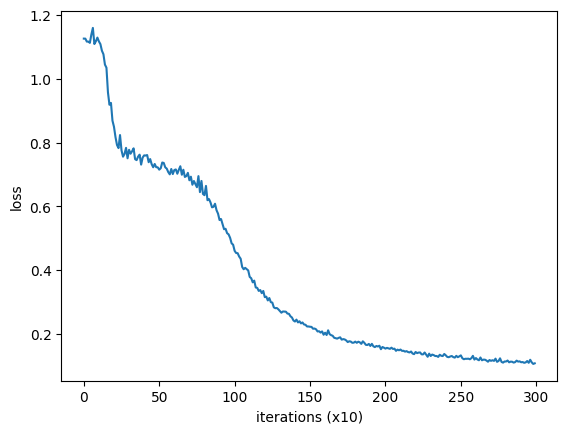

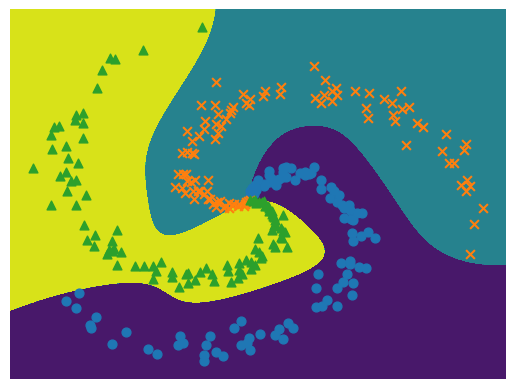

In [2]:
# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

| 에폭 1 |  반복 1 / 9 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 9 | 시간 0[s] | 손실 1.18
| 에폭 3 |  반복 1 / 9 | 시간 0[s] | 손실 1.17
| 에폭 4 |  반복 1 / 9 | 시간 0[s] | 손실 1.17
| 에폭 5 |  반복 1 / 9 | 시간 0[s] | 손실 1.13
| 에폭 6 |  반복 1 / 9 | 시간 0[s] | 손실 1.11
| 에폭 7 |  반복 1 / 9 | 시간 0[s] | 손실 1.12
| 에폭 8 |  반복 1 / 9 | 시간 0[s] | 손실 1.14
| 에폭 9 |  반복 1 / 9 | 시간 0[s] | 손실 1.12
| 에폭 10 |  반복 1 / 9 | 시간 0[s] | 손실 1.11
| 에폭 11 |  반복 1 / 9 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 9 | 시간 0[s] | 손실 1.11
| 에폭 13 |  반복 1 / 9 | 시간 0[s] | 손실 1.12
| 에폭 14 |  반복 1 / 9 | 시간 0[s] | 손실 1.13
| 에폭 15 |  반복 1 / 9 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 9 | 시간 0[s] | 손실 1.11
| 에폭 17 |  반복 1 / 9 | 시간 0[s] | 손실 1.07
| 에폭 18 |  반복 1 / 9 | 시간 0[s] | 손실 1.02
| 에폭 19 |  반복 1 / 9 | 시간 0[s] | 손실 1.00
| 에폭 20 |  반복 1 / 9 | 시간 0[s] | 손실 0.98
| 에폭 21 |  반복 1 / 9 | 시간 0[s] | 손실 0.91
| 에폭 22 |  반복 1 / 9 | 시간 0[s] | 손실 0.90
| 에폭 23 |  반복 1 / 9 | 시간 0[s] | 손실 0.86
| 에폭 24 |  반복 1 / 9 | 시간 0[s] | 손실 0.85
| 에폭 25 |  반복 1 / 9 | 시간 0[s] | 손실 0.82
| 에폭 26 |

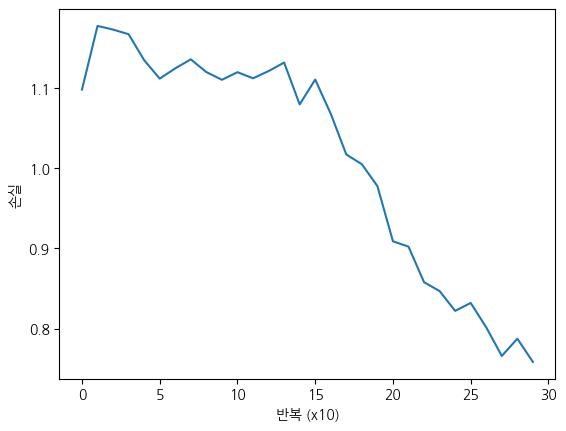

In [4]:
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet

# 1. hyperparams
max_epochs = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2. data & model & optimizer
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# train
trainer = Trainer(model, optimizer)
trainer.fit(x, t, batch_size, eval_interval=10) # eval_interval (손실 등 출력 간격)
                                                # max_grad (기울기 최대 norm, clipping)
plt.rcParams['font.family'] = 'NanumGothic'
trainer.plot()

In [6]:
a = np.random.randn(3)
a.dtype

dtype('float64')

In [8]:
b = a.astype(np.float32)
b.dtype

dtype('float32')

In [12]:
c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')

In [ ]:
import cupy as cp
x = cp.arange(6).reshape(2, 3).astype('f')
x.sum(axis=1)